<center>

![image](https://publish.purewow.net/wp-content/uploads/sites/2/2018/05/nyc-yellow-taxi-in-times-square-hero.jpg)

</center>

# Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
# Чтение и работа с данными
import numpy as np
import pandas as pd

# Визуализация зависимостей и распределений в данных
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка на нормальность распределений
from scipy import stats

# Отбор и преобразование признаков
from sklearn import preprocessing
from sklearn import cluster
from sklearn import feature_selection

# Создание выборок данных
from sklearn import model_selection

# Модели ML
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

# Метрики оценки качества моделей
from sklearn import metrics

# Игнорирование возможных предупреждений
import warnings
warnings.filterwarnings('ignore')

# Визуальная настройка графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")

print('Размер исходных данных: {}'.format(taxi_data.shape))
taxi_data.head()

Размер исходных данных: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Условно, признаки можно разделить на несколько групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**

* `id` - уникальный идентификатор поездки;

* `vendor_id` - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки.

**Временные характеристики:**

* `pickup_datetime` - дата и время, когда был включён счётчик поездки;

* `dropoff_datetime` - дата и время, когда счётчик был отключён.

**Географическая информация:**

* `pickup_longitude` -  долгота, на которой был включён счётчик;

* `pickup_latitude` - широта, на которой был включён счётчик;

* `dropoff_longitude` - долгота, на которой счётчик был отключён;

* `dropoff_latitude` - широта, на которой счётчик был отключён.

**Прочие признаки:**

* `passenger_count` - количество пассажиров в транспортном средстве (введённое водителем значение);

* `store_and_fwd_flag` - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. `Y` - хранить и пересылать, `N` - не хранить и не пересылать поездку.

**Целевой признак:**

* `trip_duration` - продолжительность поездки в секундах.


Для начала мы проведём базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведём признак `pickup_datetime` в тип данных *datetime* с форматом год-месяц-день час:минута:секунда. 

Определим временные рамки, за которые представлены данные.

In [3]:
# Переводим признак 'pickup_datetime' в тип данных datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Определяем временные рамки
display(taxi_data['pickup_datetime'].min())
display(taxi_data['pickup_datetime'].max())

Timestamp('2016-01-01 00:00:17')

Timestamp('2016-06-30 23:59:39')

Посмотрим на пропуски. Сколько пропущенных значений присутствует в наших данных?

In [4]:
# Проверяем пропуски в признаках
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Посмотрим на статистические характеристики некоторых признаков, узнаем:

* Сколько уникальных таксопарков присутствует в данных?

* Каково максимальное количество пассажиров?

* Чему равна средняя и медианная длительность поездки?

* Чему равно минимальное и максимальное время поездки?


In [5]:
# Выводим основные статистические характеристики числовых признаков
taxi_data.describe()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
min,1.000000e+00,2016-01-01 00:00:17,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:19:40,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06
std,4.987772e-01,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03


Займёмся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


Реализуем функцию `add_datetime_features()`, которая принимает на вход таблицу с данными о поездках (`taxi_data`) и возвращает ту же таблицу с добавленными в неё 3 столбцами:

* `pickup_date` - дата включения счётчика - начала поездки (без времени);

* `pickup_hour` - час дня включения счётчика;

* `pickup_day_of_week` - порядковый номер дня недели (число), в который был включён счетчик.

In [6]:
# Реализуем необходимую функцию
def add_datetime_features(data):
    data['pickup_date'] = data['pickup_datetime'].dt.date
    data['pickup_hour'] = data['pickup_datetime'].dt.hour
    data['pickup_day_of_week'] = data['pickup_datetime'].dt.dayofweek
    return data

# Преобразовываем наш датасет
taxi_data = add_datetime_features(taxi_data)

Реализуем функцию `add_holiday_features()`, которая принимает на вход две таблицы: 

* Таблицу с данными о поездках;

* Таблицу с данными о праздничных днях;

и возвращает обновлённую таблицу с данными о поездках с добавленным в неё столбцом `pickup_holiday` - бинарным признаком того, начата ли поездка в праздничный день или нет (`1` - да, `0` - нет).

In [7]:
# Читаем таблицу с информацией о праздничных днях в Нью-Йорке
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')

# Реализуем необходимую функцию
def add_holiday_features(data, data_2):
    features = []
    for holiday_date in range(len(data_2['date'])):
        features.append(data_2['date'][holiday_date])
    data['pickup_holiday'] = data['pickup_date'].apply(lambda x: 1 if str(x) in features else 0)
    return data

# Преобразовываем наш датасет
taxi_data = add_holiday_features(taxi_data, holiday_data)

Реализуем функцию `add_osrm_features()`, которая принимает на вход две таблицы:

* Таблицу с данными о поездках;

* Таблицу с данными из *OSRM*;

и возвращает обновлённую таблицу с данными о поездках с добавленными в неё 3 столбцами:

* `total_distance`;

* `total_travel_time`;

* `number_of_steps`.

В результате объединения таблиц у нас должны были получиться пропуски в столбцах с информацией из *OSRM-API*. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

In [8]:
# Читаем нашу OSRM-таблицу
osrm_data = pd.read_csv('data/osrm_data_train.csv')

# Реализуем необходимую функцию
def add_osrm_features(data, data_2):
    data = data.merge(data_2[['id', 'total_distance', 'total_travel_time', 'number_of_steps']], on='id', how='left')
    return data

# Преобразовываем наш датасет
taxi_data = add_osrm_features(taxi_data, osrm_data)

Реализуем функцию `add_geographical_features()`, которая принимает на вход таблицу с данными о поездках и возвращает обновлённую таблицу с добавленными в неё 2 столбцами:

* `haversine_distance` - расстояние Хаверсина между точкой, в которой был включён счётчик, и точкой, в которой счётчик был выключен;

* `direction` - направление движения из точки, в которой был включён счётчик, в точку, в которой счётчик был выключен.

In [ ]:
# Функция нахождения расстояния Хаверсина между точками
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # Переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # Радиус земли в километрах
    EARTH_RADIUS = 6371 
    # Cчитаем кратчайшее расстояние `h` по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# Функция нахождения направления движения между точками
def get_angle_direction(lat1, lng1, lat2, lng2):
    # Переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # Cчитаем угол направления движения `alpha` по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [10]:
# Реализуем необходимую функцию
def add_geographical_features(data):
    data['haversine_distance'] = get_haversine_distance(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])
    data['direction'] = get_angle_direction(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])
    return data

# Преобразовываем наш датасет
taxi_data = add_geographical_features(taxi_data)

Реализуем функцию `add_cluster_features()`, которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновлённую таблицу с добавленными в неё столбцом `geo_cluster` - географический кластер, к которому относится поездка.

In [11]:
# Cоздаём обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))

# Обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# Реализуем необходимую функцию
def add_cluster_features(data, kmeans):
    data['geo_cluster'] = kmeans.predict(data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])
    return data

# Преобразовываем наш датасет
taxi_data = add_cluster_features(taxi_data, kmeans)

Реализуем функцию `add_weather_features()`, которая принимает на вход две таблицы:

* Таблицу с данными о поездках;

* Таблицу с данными о погодных условиях на каждый час;

и возвращает обновлённую таблицу с данными о поездках с добавленными в неё 5 столбцами:

* `temperature` - температура;

* `visibility` - видимость;

* `wind speed` - средняя скорость ветра;

* `precip` - количество осадков;

* `events` - погодные явления.

В результате объединения у вас должны получиться записи, для которых в столбцах `temperature`, `visibility`, `wind` `speed`, `precip`, и `events` будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счётчик поездки.

In [12]:
# Читаем имеющуюся у нас таблицу с погодными условиями в Нью-Йорке
weather_data = pd.read_csv('data/weather_data.csv')

# Реализуем необходимую функцию
def add_weather_features(data, data_2):
    data_2_cols = ['temperature', 'visibility', 'wind speed', 'precip', 'events', 'hour', 'date']
    # Переводим столбцы в корректный формат
    data_2['date'] = pd.to_datetime(data_2['time']).dt.date
    data_2['hour'] = pd.to_datetime(data_2['time']).dt.hour
    # Соединяем наши таблицы
    data = data.merge(data_2[data_2_cols],
                      left_on = ['pickup_date', 'pickup_hour'],
                      right_on = ['date', 'hour'],
                      how='left')
    # Удаляем лишние столбцы
    data = data.drop(['date', 'hour'], axis=1)
    return data

# Преобразовываем наш датасет
taxi_data = add_weather_features(taxi_data, weather_data)

Реализуем функцию `fill_null_weather_data()`, которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах:

* Пропуски в столбцах с погодными условиями -  `temperature`, `visibility`, `wind speed,` `precip` заполним медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируем данные по столбцу `pickup_date` и рассчитаем медиану в каждой группе, после чего с помощью комбинации методов `transform()` и `fillna()` заполним пропуски. 

* Пропуски в столбце `events` заполним строкой `'None'` - символом отсутствия погодных явлений (снега/дождя/тумана). 

* Пропуски в столбцах с информацией из *OSRM-API* - `total_distance`, `total_travel_time` и `number_of_steps` заполним медианным значением по столбцам.

In [13]:
# Реализуем необходимую функцию
def fill_null_weather_data(data):
    data['temperature'] = data['temperature'].fillna(data.groupby('pickup_date')['temperature'].transform('median'))
    data['visibility'] = data['visibility'].fillna(data.groupby('pickup_date')['visibility'].transform('median'))
    data['wind speed'] = data['wind speed'].fillna(data.groupby('pickup_date')['wind speed'].transform('median'))
    data['precip'] = data['precip'].fillna(data.groupby('pickup_date')['precip'].transform('median'))
    data['events'] = data['events'].fillna('None')
    data['total_distance'] = data['total_distance'].fillna(data['total_distance'].median())
    data['total_travel_time'] = data['total_travel_time'].fillna(data['total_travel_time'].median())
    data['number_of_steps'] = data['number_of_steps'].fillna(data['number_of_steps'].median())
    return data
    
# Преобразовываем наш датасет
taxi_data = fill_null_weather_data(taxi_data)

В завершение первой части найдём очевидные выбросы в целевой переменной - длительности поездки (`trip_duration`). 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счётчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу.

Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 

$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$

Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


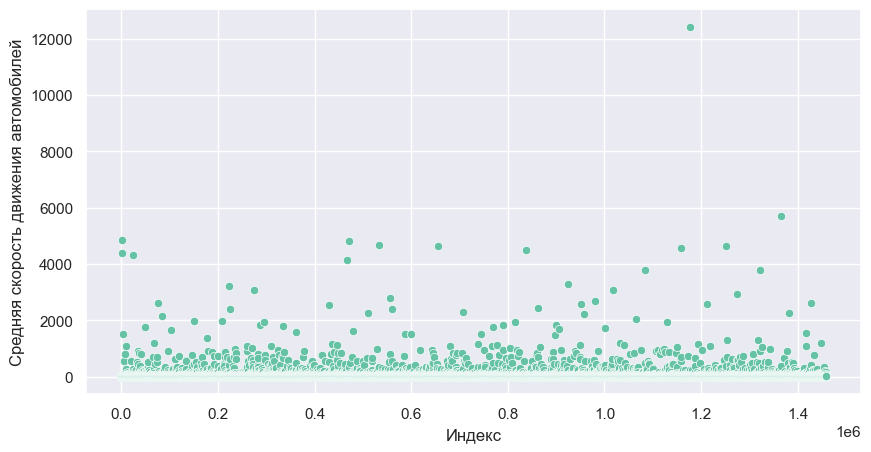

In [14]:
# Считаем среднюю скорость движения автомобилей
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

# Визуализируем 'avg_speed' в виде диаграммы рассеяния
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Индекс')
ax.set_ylabel('Средняя скорость движения автомобилей');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


Найдём поездки, длительность которых превышает 24 часа. И удалим их из набора данных.

А так же найдём поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и тоже удалим их из данных.

In [15]:
# Отбираем индексы для удаления согласно описанных выше условий
drop_data = taxi_data[(taxi_data['trip_duration'] / 60 / 60 > 24) | (taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 > 300)].index

# Удаляем найденные индексы и смотрим на результат всех наших преобразований
taxi_data = taxi_data.drop(drop_data, axis=0)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,311.7,8.0,1.225080,-119.059338,0,7.8,16.1,11.1,0.0,None
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,589.6,11.0,6.049836,25.342196,6,7.2,2.8,18.5,8.1,Rain
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,642.9,10.0,7.824606,-150.788492,9,18.3,16.1,0.0,0.0,None
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,161.6,7.0,1.092564,35.033294,0,-2.8,16.1,9.3,0.0,None


# Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:

* Исследуем сформированный набор данных; 

* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;

* Дополним наш анализ визуализациями.


Начинаем с целевого признака.

Забегая вперёд, скажу, что основной метрикой качества решения поставленной задачи будем использовать *RMSLE* - *Root Mean Squared Log Error*, которая вычисляется на основе целевой переменной в логарифмическом масштабе.

В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:

$$trip\_duration\_log = log(trip\_duration+1),$$

где под символом *log* подразумевается натуральный логарифм.

In [16]:
# Переводим целевой признак в логарифмический масштаб
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

Построим гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (`trip_duration_log`). 

Исходя из визуализации, сделаем предположение, является ли полученное распределение нормальным? 
Проверьте это нам поможет тест Д’Агостино при уровне значимости: $\alpha=0.05$.

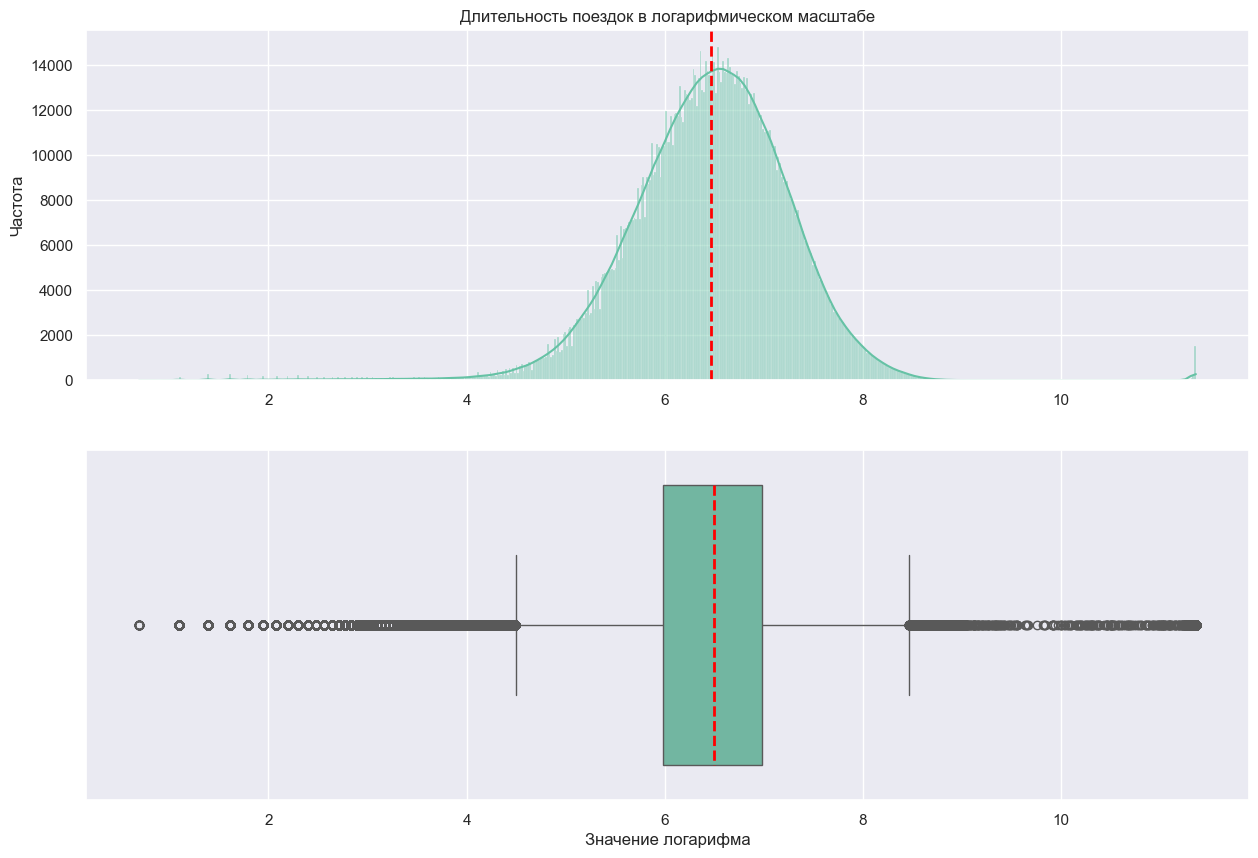

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Визуализируем распределение длительности поездок в логарифмическом масштабе (в виде гистограммы)
sns.histplot(data=taxi_data['trip_duration_log'], kde=True, legend=False, ax=axes[0])
axes[0].set(xlabel = '', ylabel='Частота')
axes[0].set_title('Длительность поездок в логарифмическом масштабе')
axes[0].axvline(taxi_data['trip_duration_log'].mean(), color='red', linestyle='--', linewidth=2)

# Визуализируем это же распределение, но в виде коробчатой диаграммы
sns.boxplot(data=taxi_data['trip_duration_log'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--', 'linewidth': '2'})
axes[1].set(xlabel='Значение логарифма');

In [ ]:
# Проверяем нормальность распределения с помощью теста Д’Агостино
z, p_value = stats.normaltest(taxi_data['trip_duration_log'])

if (p_value < 0.05):
    print('Распределние отлично от нормального')
else:
    print('Распределние является нормальным')

Распределние отлично от нормального


Построим визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (`trip_duration_log`) в зависимости от таксопарка (`vendor_id`). 

Сравним два распределения между собой.

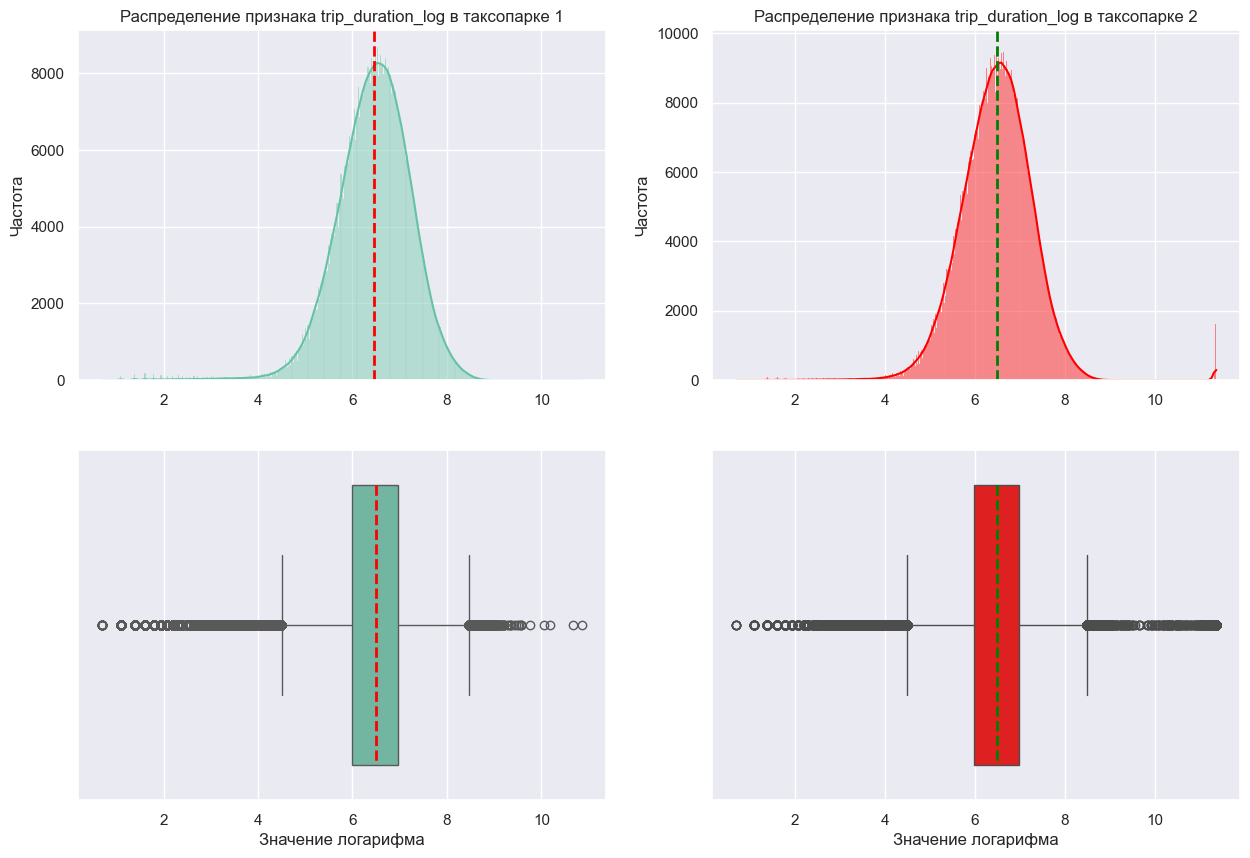

In [19]:
# Отбираем записи для каждого таксопарка
first_vendor = taxi_data[taxi_data['vendor_id'] == 1]
second_vendor = taxi_data[taxi_data['vendor_id'] == 2]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Визуализируем уже знакомое нам распределение для первого таксопарка
sns.histplot(data=first_vendor['trip_duration_log'], kde=True, legend=False, ax=axes[0, 0])
axes[0, 0].set(xlabel = '', ylabel='Частота')
axes[0, 0].set_title('Распределение признака trip_duration_log в таксопарке 1')
axes[0, 0].axvline(first_vendor['trip_duration_log'].mean(), color='red', linestyle='--', linewidth=2)

sns.boxplot(data=first_vendor['trip_duration_log'], ax=axes[1, 0], orient='h', medianprops={'color': 'red', 'linestyle': '--', 'linewidth': '2'})
axes[1, 0].set(xlabel='Значение логарифма')

# То же самое делаем и для второго таксопарка
sns.histplot(data=second_vendor['trip_duration_log'], kde=True, legend=False, color='red', ax=axes[0, 1])
axes[0, 1].set(xlabel = '', ylabel='Частота')
axes[0, 1].set_title('Распределение признака trip_duration_log в таксопарке 2')
axes[0, 1].axvline(second_vendor['trip_duration_log'].mean(), color='green', linestyle='--', linewidth=2)

sns.boxplot(data=second_vendor['trip_duration_log'], color='red', ax=axes[1, 1], orient='h', medianprops={'color': 'green', 'linestyle': '--', 'linewidth': '2'})
axes[1, 1].set(xlabel='Значение логарифма');

Построим визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (`trip_duration_log`) в зависимости от признака отправки сообщения поставщику (`store_and_fwd_flag`). 

Так же сравним два распределения между собой.

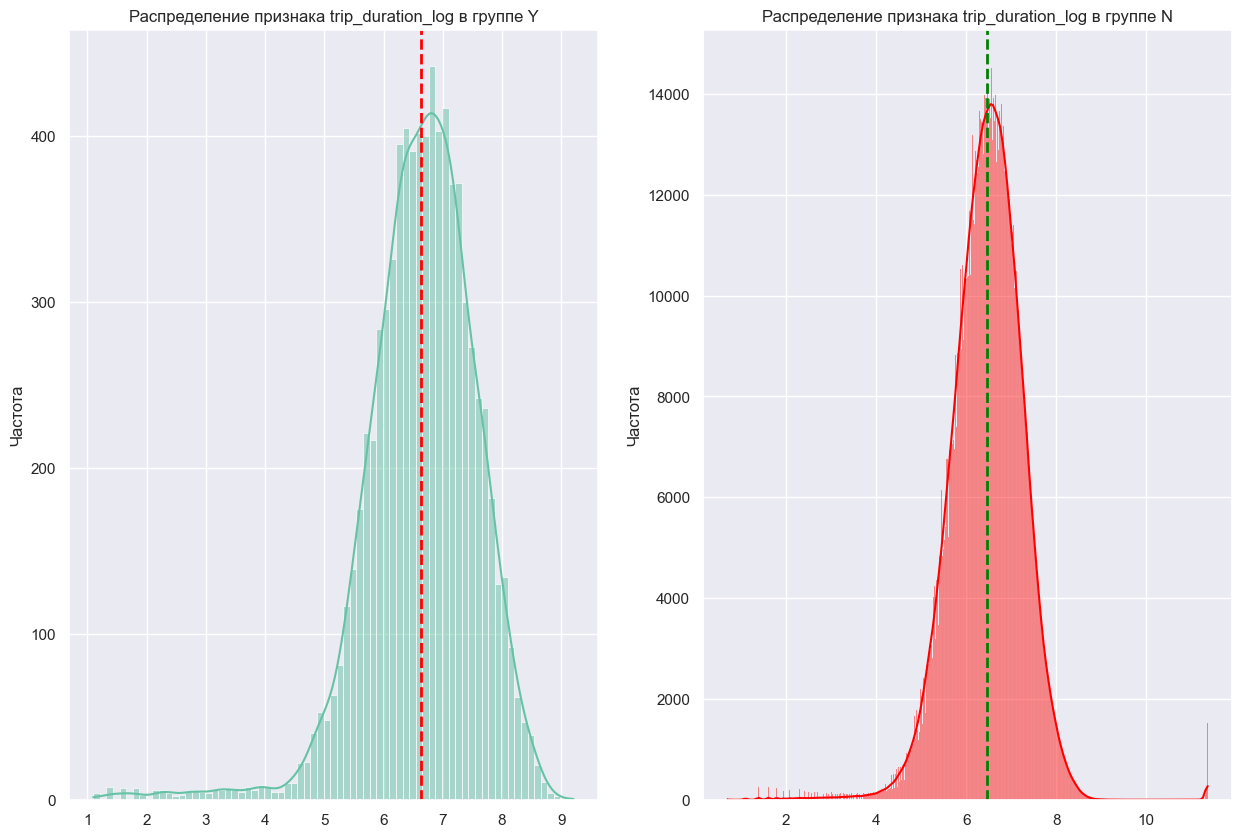

In [20]:
# Отбираем записи для каждой категории признака отправки сообщения поставщику
y_flag = taxi_data[taxi_data['store_and_fwd_flag'] == 'Y']
n_flag = taxi_data[taxi_data['store_and_fwd_flag'] == 'N']

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Визуализируем уже знакомое нам распределение для первой группы — `Y`
sns.histplot(data=y_flag['trip_duration_log'], kde=True, legend=False, ax=axes[0])
axes[0].set(xlabel = '', ylabel='Частота')
axes[0].set_title('Распределение признака trip_duration_log в группе Y')
axes[0].axvline(y_flag['trip_duration_log'].mean(), color='red', linestyle='--', linewidth=2)

# То же самое делаем и для второй группы — `N`
sns.histplot(data=n_flag['trip_duration_log'], kde=True, legend=False, color='red', ax=axes[1])
axes[1].set(xlabel = '', ylabel='Частота')
axes[1].set_title('Распределение признака trip_duration_log в группе N')
axes[1].axvline(n_flag['trip_duration_log'].mean(), color='green', linestyle='--', linewidth=2);

Построим две визуализации:

* Визуализацию распределения количества поездок в зависимости от часа дня;

* Визуализацию зависимости медианной длительности поездки от часа дня.

Эти визуализации помогут нам дать ответы на следующие вопросы:

* В какое время суток такси заказывают реже всего?

* В какое время суток наблюдается пик медианной длительности поездок?

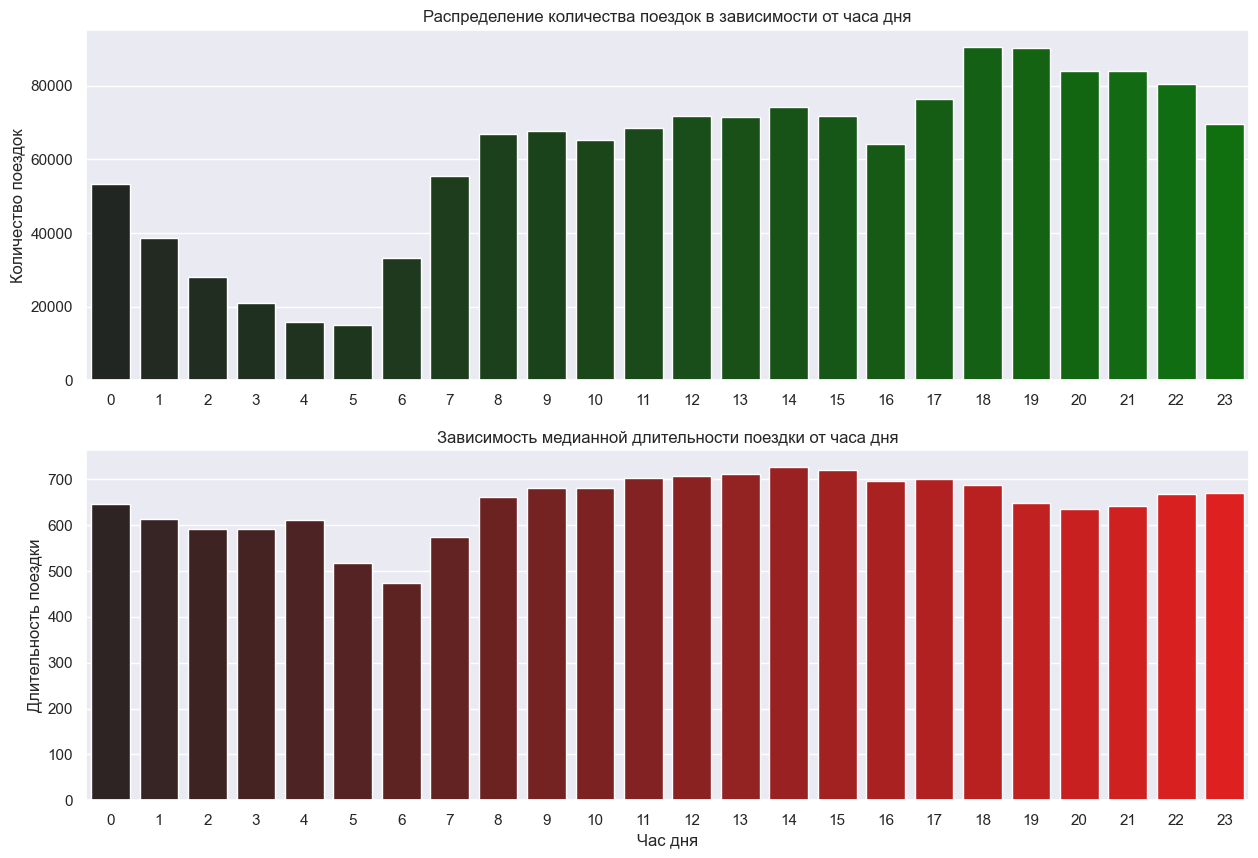

In [21]:
# Группируем длительность поездок в зависимости от часа дня и находим их медианное значение
trip_duration_by_hour = taxi_data.groupby('pickup_hour', as_index=False)['trip_duration'].median()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Визуализируем распределение количества поездок в зависимости от часа дня
sns.countplot(taxi_data,
              x='pickup_hour',
              hue='pickup_hour',
              palette='dark:green',
              legend=False,
              ax=axes[0]
)
axes[0].set_title('Распределение количества поездок в зависимости от часа дня')
axes[0].set_xlabel('')
axes[0].set_ylabel('Количество поездок')

# Визуализируем зависимость медианной длительности поездки от часа дня
sns.barplot(trip_duration_by_hour,
            x='pickup_hour',
            y='trip_duration',
            hue='pickup_hour',
            palette='dark:red',
            legend=False,
            ax=axes[1])
axes[1].set_title('Зависимость медианной длительности поездки от часа дня')
axes[1].set_xlabel('Час дня')
axes[1].set_ylabel('Длительность поездки');

Снова построим две визуализации:

* Визуализацию распределения количества поездок в зависимости от дня недели;

* Визуализацию зависимости медианной длительности поездки от дня недели.

В свою очередь эти графики дадут нам ответы на следующие вопросы:

* В какой день недели совершается больше всего поездок?

* В какой день недели медианная длительность поездок наименьшая?

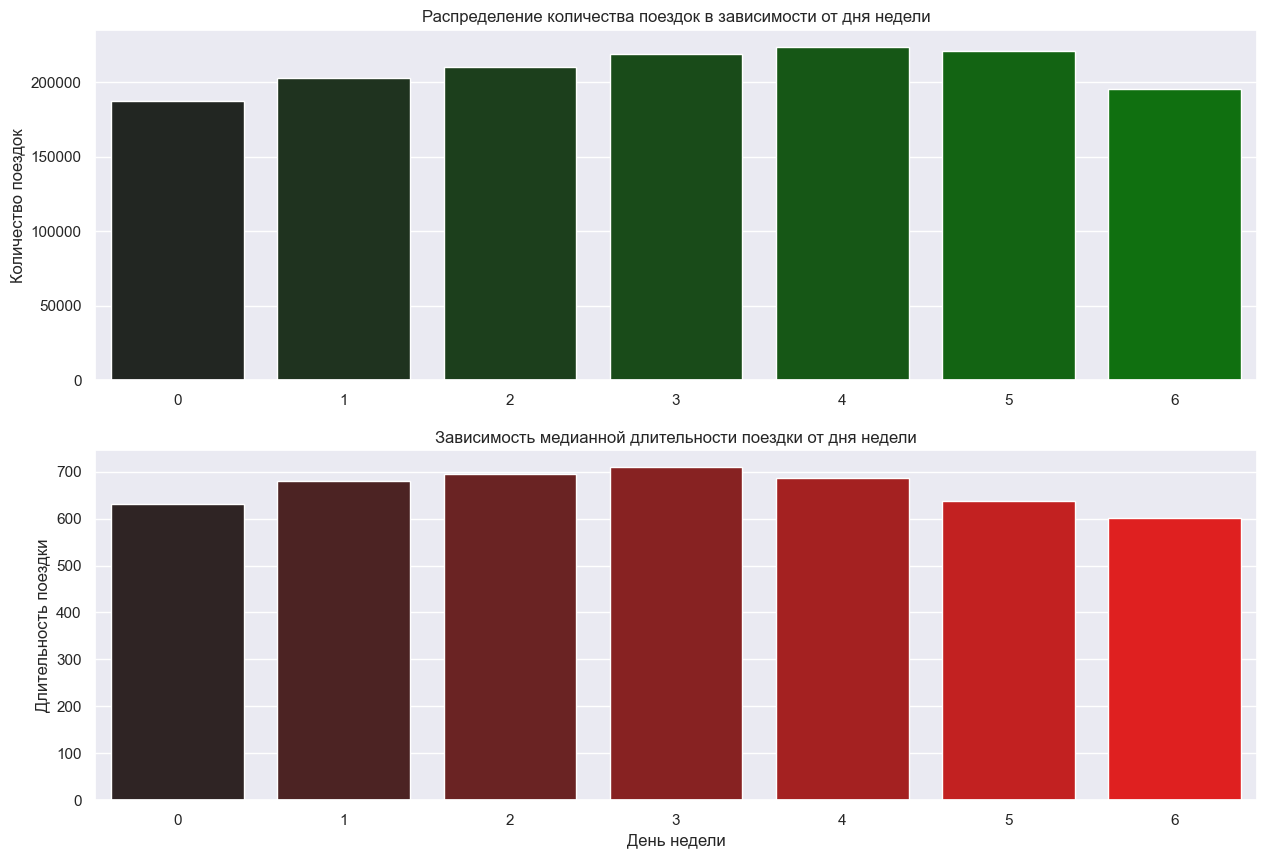

In [22]:
# Группируем длительность поездок в зависимости от дня недели и находим их медианное значение
trip_duration_by_day_of_week = taxi_data.groupby('pickup_day_of_week', as_index=False)['trip_duration'].median()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Визуализируем распределение количества поездок в зависимости от дня недели
sns.countplot(taxi_data,
              x='pickup_day_of_week',
              hue='pickup_day_of_week',
              palette='dark:green',
              legend=False,
              ax=axes[0]
)
axes[0].set_title('Распределение количества поездок в зависимости от дня недели')
axes[0].set_xlabel('')
axes[0].set_ylabel('Количество поездок')

# Визуализируем зависимость медианной длительности поездки от дня недели
sns.barplot(trip_duration_by_day_of_week,
            x='pickup_day_of_week',
            y='trip_duration',
            hue='pickup_day_of_week',
            palette='dark:red',
            legend=False,
            ax=axes[1])
axes[1].set_title('Зависимость медианной длительности поездки от дня недели')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Длительность поездки');

Теперь посмотрим на обе временные характеристики одновременно. 

Построим сводную таблицу, по строкам которой будут отложены часы (`pickup_hour`), по столбцам - дни недели (`pickup_day_of_week`), а в ячейках - медианная длительность поездки (`trip_duration`). 

Визуализируем полученную сводную таблицу с помощью тепловой карты.

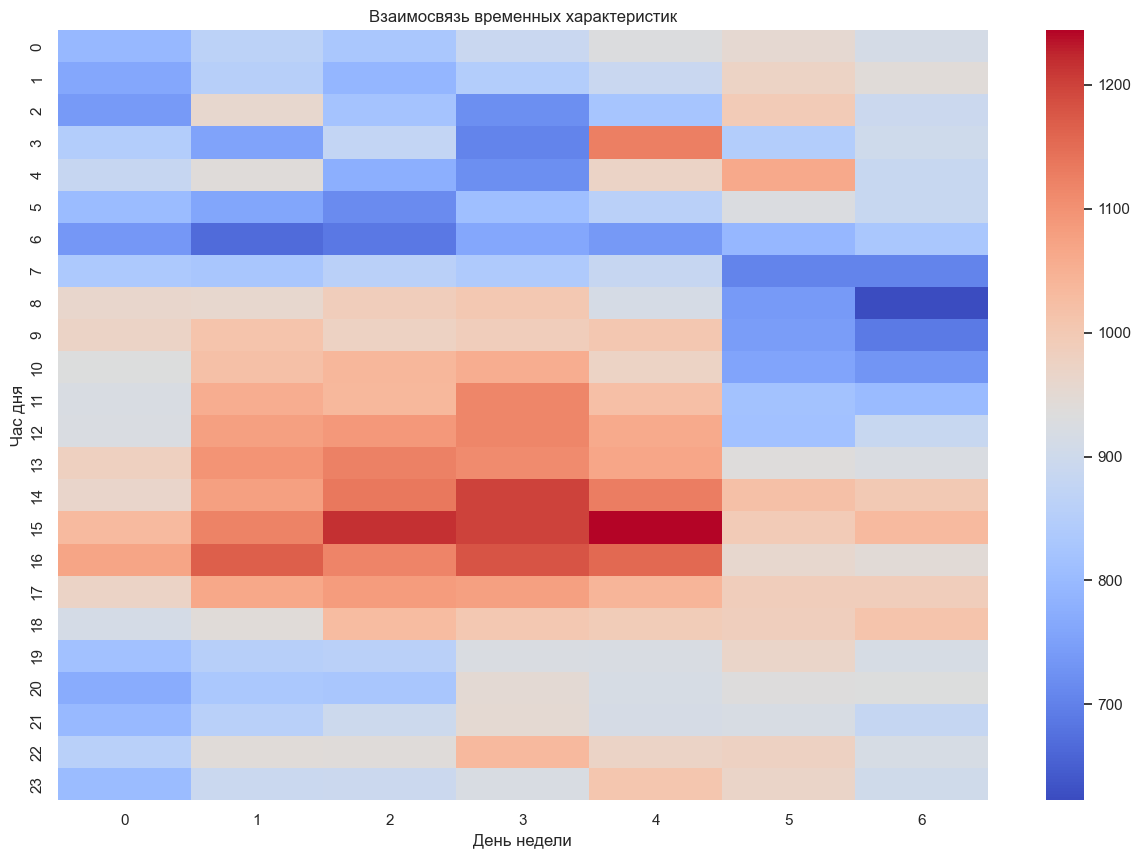

In [23]:
# Создаём сводную таблицу, согласно оговорённым выше условиям
pivot_table = taxi_data.pivot_table(index='pickup_hour', columns='pickup_day_of_week', values='trip_duration')

fig = plt.figure(figsize=(15, 10))

# Визуализируем нашу полученную сводную таблицу
heatmap = sns.heatmap(pivot_table, cmap='coolwarm')
heatmap.set_title('Взаимосвязь временных характеристик')
heatmap.set_xlabel('День недели')
heatmap.set_ylabel('Час дня');

В завершение визуального анализа наших данных построим две диаграммы рассеяния:

* Первая должна иллюстрировать географическое расположение точек начала поездок (`pickup_longitude`, `pickup_latitude`) 

* Вторая должна географическое расположение точек завершения поездок (`dropoff_longitude`, `dropoff_latitude`).

Для этого на диаграммах по оси абсцисс отложим широту (`longitude`), а по оси ординат - долготу (`latitude`). 
Включим в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавим следующие ограничения на границы осей абсцисс и ординат:
 
`city_long_border` = (-74.03, -73.75)

`city_lat_border` = (40.63, 40.85)

Добавим на диаграммы расцветку по десяти географическим кластерам (`geo_cluster`), которые мы сгенерировали ранее.


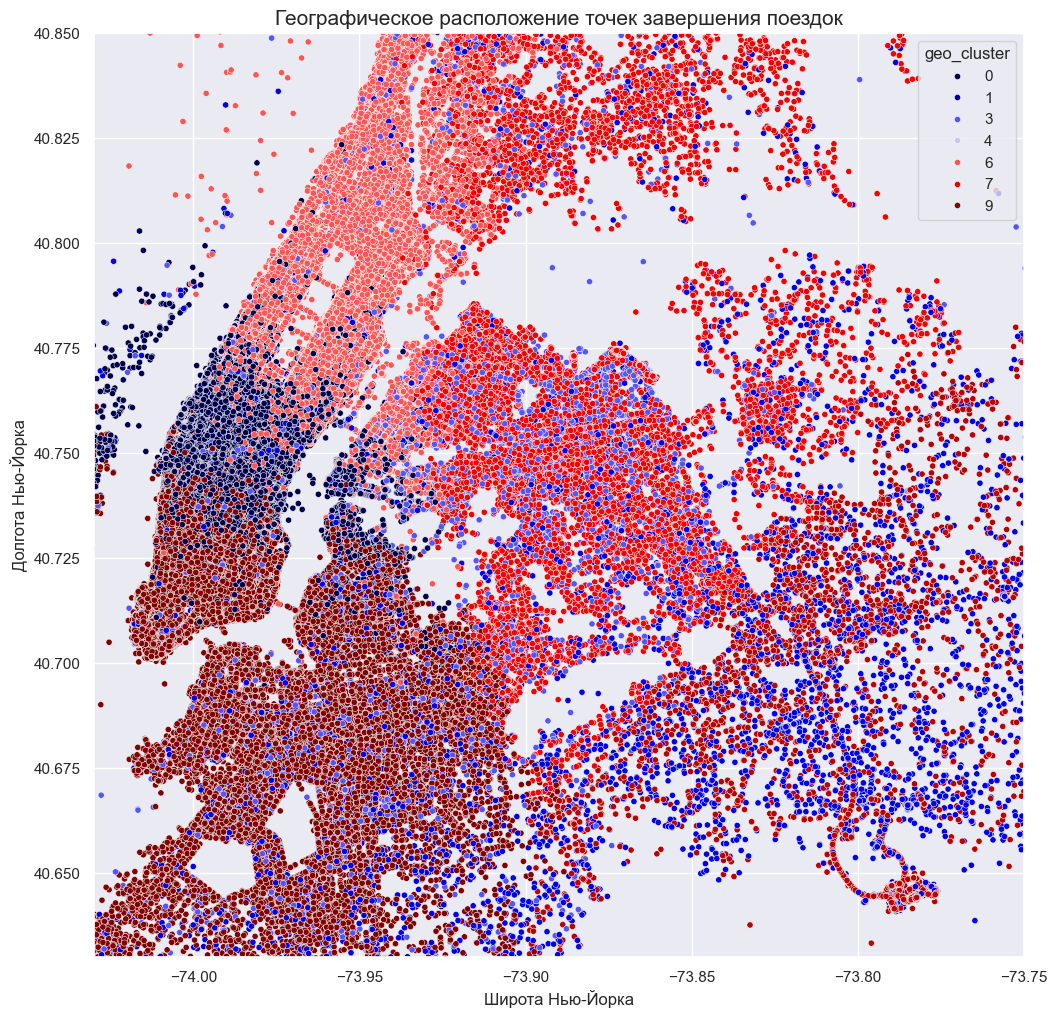

In [24]:
# Задаём ограничения для осей абсцисс и ординат
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig = plt.figure(figsize = (12, 12))

# Строим диаграмму рассеяния
scatterplot = sns.scatterplot(
    data=taxi_data,
    x='dropoff_longitude',
    y='dropoff_latitude', 
    hue='geo_cluster',
    palette='seismic', 
    s=20,
);

# Задаём названия графику, осям координат и определяем границы отрисовки
scatterplot.set_title('Географическое расположение точек завершения поездок', fontsize=15)
scatterplot.set_xlabel('Широта Нью-Йорка')
scatterplot.set_ylabel('Долгота Нью-Йорка')
scatterplot.set_xlim(city_long_border)
scatterplot.set_ylim(city_lat_border)
plt.show()

# Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов:

* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;

* Надо отобрать признаки, которые мы будем использовать для обучения модели;

* Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [25]:
# Проверяем наш датасет перед дальнейшими преобразованиями
print('Размер данных: {}'.format(taxi_data.shape))
print('Столбцы: {}'.format(taxi_data.columns))

Размер данных: (1458233, 27)
Столбцы: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [26]:
# Копируем наш датасет и проверяем корректность копирования
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None,6.077642


Сразу позаботимся об очевидных неинформативных и избыточных признаках:

In [27]:
# Избавляемся от очевидных неинформативных и избыточных признаках
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)
train_data.shape

(1458233, 25)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [ ]:
drop_columns = ['pickup_datetime', 'pickup_date']

train_data = train_data.drop(drop_columns, axis=1)
print('Размер данных: {}'.format(train_data.shape))

Размер данных: (1458233, 23)


Закодируем признак `vendor_id` в таблице `train_data` таким образом, чтобы он был равен `0`, если идентификатор таксопарка равен `1`, и `1` — в противном случае.

Так же закодируем признак `store_and_fwd_flag` в таблице `train_data` таким образом, чтобы он был равен `0`, если флаг выставлен в значение `'N'`, и `1` — в противном случае.

In [29]:
from sklearn.preprocessing import LabelEncoder

# Объявляем кодировщик и кодируем необходимые нам столбцы
label_encoder = LabelEncoder()
train_data['vendor_id'] = label_encoder.fit_transform(train_data['vendor_id'])
train_data['store_and_fwd_flag'] = label_encoder.fit_transform(train_data['store_and_fwd_flag'])

Создадим таблицу `data_onehot` из закодированных однократным кодированием признаков `pickup_day_of_week`, `geo_cluster` и `events` в таблице `train_data` с помощью *OneHotEncoder* из библиотеки *sklearn*. Параметр `drop` выставим в значение `'first'`, чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре `handle_unknown` установим значение `'ignore'`. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы *OneHotEncoder* мы получим безымянный *numpy*-массив, который нам будет необходимо преобразовать обратно в *DataFrame*, для более удобной работы в дальнейшем.

В результате выполнения кода у нас должен быть образован *DataFrame* `data_onehot`, который содержит кодированные категориальные признаки `pickup_day_of_week`, `geo_cluster` и `events`.

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Отбираем записи для кодировки
data_onehot = train_data[['pickup_day_of_week', 'geo_cluster', 'events']]

# Объявляем кодировщик и кодируем необходимые нам записи
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_data = one_hot_encoder.fit_transform(data_onehot).toarray()

# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out(input_features=data_onehot.columns)

# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(encoded_data, columns=column_names)

Добавим полученную таблицу с закодированными признаками:

In [31]:
# Отбираем признаки для замены
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Удаляем отобранные признаки и заменяем их полученными нами ранее 
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Размер данных: {}'.format(train_data.shape))

Размер данных: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений `X`, вектор целевой переменной `y` и его логарифм `y_log`. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака `trip_duration` и его логарифмированной версии `trip_duration_log`:

In [32]:
# Определяем предикторы — 'X' и целевые признаки — 'y' и 'y_log'
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии: `y_log`.

Выбранный тип валидации - `hold-out`. Разобьём выборку на обучающую и валидационную в соотношении 67/33:

In [33]:
# Разбиваем выборки на обучающую и валидационную
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


Для этого с помощью *SelectKBest* отберём 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуем по обучающей выборке, используя параметр `score_func = f_regression`.

In [34]:
from sklearn.feature_selection import SelectKBest, f_regression

# Объявляем и обучаем объект класса 'SelectKBest'
select_k_best = SelectKBest(f_regression, k=25)
select_k_best.fit(X_train, y_train_log)

# Для удобства упаковываем полученный массив из признаков в переменную
features = select_k_best.get_feature_names_out()

# Для проверки результата выведем полученный массив
features

array(['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_hour', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'temperature', 'pickup_day_of_week_1',
       'pickup_day_of_week_2', 'pickup_day_of_week_3',
       'pickup_day_of_week_4', 'pickup_day_of_week_5',
       'pickup_day_of_week_6', 'geo_cluster_2', 'geo_cluster_3',
       'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8'], dtype=object)

In [35]:
# Отбираем в выборках полученные признаки 
X_train = X_train[features]
X_valid = X_valid[features]

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


А именно — нормализуем предикторы в обучающей и валидационной выборках с помощью *MinMaxScaler* из библиотеки *sklearn*. Не забываем, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Объявляем и обучаем нормализатор
scaler = MinMaxScaler()
scaler.fit(X_train)

# Преобразовываем наши выборки нормализатором
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Как уже говорилось ранее, в качестве метрики будем использовать *RMSLE* (*Root Mean Squared Log Error*), которая вычисляется как:

$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$

где:

* $y_i$ - истинная длительность i-ой поездки на такси (`trip_duration`)

* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику *RMSE* для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:

$$z_i=log(y_i+1),$$

$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



Для начала построим простую модель линейной регрессии на обучающей выборке. Все параметры оставим по умолчанию.

Для полученной модели рассчитаем метрику *RMSLE* на тренировочной и валидационной выборках. Вывод округлим до сотых.

In [38]:
# Объявляем и обучаем модель линейной регрессии
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled, y_train_log)

# Делаем предсказание для каждой выборки
y_train_pred = lin_reg.predict(X_train_scaled)
y_valid_pred = lin_reg.predict(X_valid_scaled)

# Записываем значения полученных метрик (они нам пригодятся позже) для каждой выборки
lin_reg_train_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
lin_reg_valid_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

# Выводим полученные значения метрик
print(f'Результат RMSLE на тренировочной выборке: {np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)}')
print(f'Результат RMSLE на валидационной выборке: {np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)}')

Результат RMSLE на тренировочной выборке: 0.54
Результат RMSLE на валидационной выборке: 0.54


Теперь сгенерируем полиномиальные признаки 2-ой степени с помощью *PolynomialFeatures* из библиотеки *sklearn*. Параметр `include_bias` выставим в значение `False`.

Построим модель полиномиальной регрессии 2-ой степени на обучающей выборке. Все параметры так же оставим по умолчанию.

In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Генерируем полиномиальные признаки 2-ой степени
poly = PolynomialFeatures(2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.fit_transform(X_valid_scaled)

# Объявляем и обучаем модель линейной регрессии
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_poly, y_train_log)

# Делаем предсказание для каждой выборки
y_train_pred = lin_reg.predict(X_train_poly)
y_valid_pred = lin_reg.predict(X_valid_poly)

# Записываем значения полученных метрик для каждой выборки
poly_lin_reg_train_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
poly_lin_reg_valid_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

# Выводим полученные значения метрик
print(f'Результат RMSLE на тренировочной выборке:{np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)}')
print(f'Результат RMSLE на валидационной выборке:{np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)}')

Результат RMSLE на тренировочной выборке:0.47
Результат RMSLE на валидационной выборке:0.69


Как мы можем заметить, у нашей модели явным образом наблюдается переобучение — такая модель нам не подходит. Нам стоит попробовать побороть переобучение добавив регуляризацию.

Чтобы это сделать построим модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке. Коэффициент регуляризации $\alpha$ установим равным 1, остальные параметры снова оставим по умолчанию.

Для полученной модели рассчитаем метрику *RMSLE* на тренировочной и валидационной выборках. Вывод округлим до сотых.

In [40]:
# Объявляем и обучаем модель полиномиальной регрессии 2-ой степени с регуляризацией по Тихонову
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train_log)

# Делаем предсказание для каждой выборки
y_train_pred = ridge.predict(X_train_scaled)
y_valid_pred = ridge.predict(X_valid_scaled)

# Записываем значения полученных метрик для каждой выборки
ridge_train_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
ridge_valid_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

# Выводим полученные значения метрик
print(f'Результат RMSLE на тренировочной выборке:{np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)}')
print(f'Результат RMSLE на валидационной выборке:{np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)}')

Результат RMSLE на тренировочной выборке:0.54
Результат RMSLE на валидационной выборке:0.54


Далее построим простую модель дерева решений (*DecisionTreeRegressor*) на обучающей выборке. Все параметры оставим по умолчанию. 

Для полученной модели рассчитаем метрику *RMSLE* на тренировочной и валидационной выборках. Вывод округляем до сотых.

Проверим, будут ли наблюдаться у нашей модели признаки переобучения?

In [41]:
# Объявляем и обучаем модель дерева решений
decision_tree = tree.DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train_log)

# Делаем предсказание для каждой выборки
y_train_pred = decision_tree.predict(X_train_scaled)
y_valid_pred = decision_tree.predict(X_valid_scaled)

# Выводим полученные значения метрик
print(f'Результат RMSLE на тренировочной выборке:{np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2)}')
print(f'Результат RMSLE на валидационной выборке:{np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2)}')

Результат RMSLE на тренировочной выборке:0.0
Результат RMSLE на валидационной выборке:0.56


Как и в случае с полиномами 2-ой степени без регуляризации, у модели дерева решений явно наблюдаются признаки переобучения — наша модель абсолютно точно предсказывает длительность поздки на тренировоной выборке, чего нельзя сказать о валидационной.

Самым верным способом борьбы с переобучением моделей деревьев решений — это оптимизация параметра глубины дерева (параметр `max_depth`). Этим мы далее и займёмся.

Переберём все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

`max_depth` = range(7, 20)

Параметр `random_state` зададим равным 42.

Для лучшей наглядности дополнительно построим линейный график изменения метрики *RMSLE* на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

Данный график поможет нам найти оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение *RMSLE* на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая ещё не начинает возрастать).

Проверим, чему будет равно значение метрик *RMSLE* на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Как и ранее, вывод округляем до сотых.

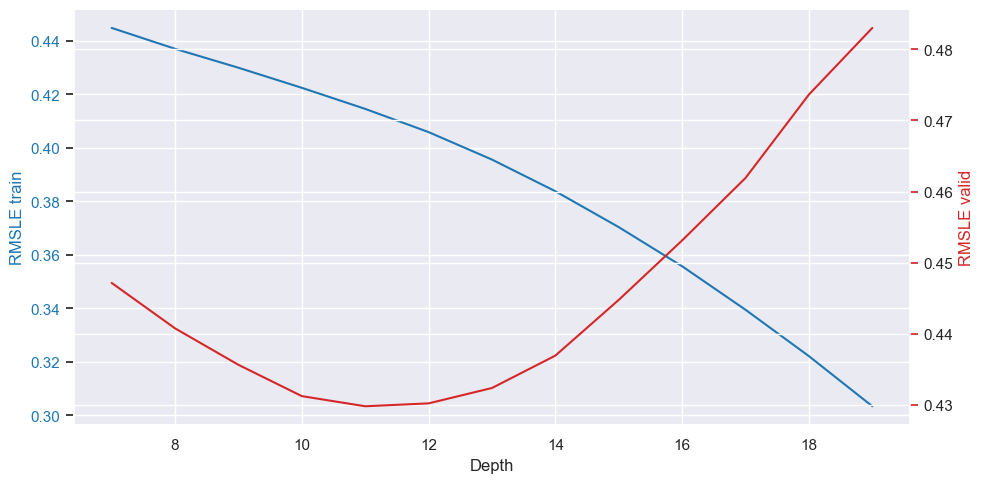

In [42]:
# Вручную реализуем функцию Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_real, y_pred):
    mse = np.sum(np.square(np.subtract(y_real, y_pred))) / len(y_real)
    return np.sqrt(mse)

# Создаём списки для значений метрик для каждой выборки и глубины дерева решений
errors_train = []
errors_valid = []
depth = []

# Проходимся циклом по всем глубинам дерева, обучая и предсказывая целевую переменную для каждой выборки
for i in range(7,20):
    decision_tree = tree.DecisionTreeRegressor(max_depth=i, random_state=42)
    decision_tree.fit(X_train_scaled, y_train_log)
    y_train_pred = decision_tree.predict(X_train_scaled)
    y_valid_pred = decision_tree.predict(X_valid_scaled)
    # Не забываем добавить значения метрик и глубины дерева в ранее созданные списки
    errors_train.append(rmsle(y_train_log, y_train_pred))
    errors_valid.append(rmsle(y_valid_log, y_valid_pred))
    depth.append(i)

# Для удобства визуализации упаковываем наши списки в DataFrame
plot_data = pd.DataFrame({'errors_train':errors_train, 'errors_valid':errors_valid}, index=depth)

# Визуализируем значения метрик для каждой глубины дерева
fig, ax1 = plt.subplots(figsize=(10, 5))
# Значения метрики для тренировочной выборки
ax1.set_xlabel('Depth')
ax1.set_ylabel('RMSLE train', color='tab:blue')
ax1.plot(plot_data[['errors_train']],
         color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# Cоздаём второй экземпляр оси 'Y' для валидационной выборки
ax2 = ax1.twinx()
ax2.set_ylabel('RMSLE valid', color='tab:red')
ax2.plot(plot_data[['errors_valid']],
         color='tab:red')
ax2.tick_params(axis='y', color='tab:red')

fig.tight_layout()
plt.show()

In [43]:
# Записываем значения полученных метрик с оптимальной глубиной дерева (12) для каждой выборки
decision_tree_train_score = float(np.round(errors_train[5], 2))
decision_tree_valid_score = float(np.round(errors_valid[5], 2))

# Выводим значения полученных метрик
display(decision_tree_train_score, decision_tree_valid_score)

0.41

0.43

# Решение задачи регрессии: ансамблевые методы и построение прогноза

Итак, переходим к тяжёлой артиллерии: ансамблевым алгоритмам. 

Для старта построим модель случайного леса на обучающей выборке. В качестве гиперпараметров укажем следующие:

* `n_estimators` = 200,

* `max_depth` = 12,

* `criterion` = 'squared_error',

* `min_samples_split` = 20,

* `random_state` = 42

Для полученной модели как обычно рассчитаем метрику *RMSLE* на тренировочной и валидационной выборках. Вывод округляем до сотых.

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Объявляем и обучаем модель случайного леса
rf_reg = RandomForestRegressor(n_estimators=200,
                               max_depth=12,
                               criterion='squared_error',
                               min_samples_leaf=20,
                               random_state=42)
rf_reg.fit(X_train_scaled, y_train_log)

# Делаем предсказание для каждой выборки
y_train_pred = rf_reg.predict(X_train_scaled)
y_valid_pred = rf_reg.predict(X_valid_scaled)

# Записываем значения полученных метрик для каждой выборки
rf_reg_train_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
rf_reg_valid_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

# Выводим полученные значения метрик
print(f'Результат RMSLE на тренировочной выборке:{rf_reg_train_score}')
print(f'Результат RMSLE на валидационной выборке:{rf_reg_valid_score}')

Результат RMSLE на тренировочной выборке:0.4
Результат RMSLE на валидационной выборке:0.41


Далее построим модель градиентного бустинга над деревьями решений (*GradientBoostingRegressor*) на обучающей выборке. В качестве гиперпараметров этой модели укажем следующие:

* `learning_rate` = 0.5,

* `n_estimators` = 100,

* `max_depth` = 6, 

* `min_samples_split` = 30,

* `random_state` = 42

Для полученной модели рассчитываем метрику *RMSLE* на тренировочной и валидационной выборках. Вывод, как и всегда, округляем до сотых.

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Объявляем и обучаем модель градиентного бустинга над деревьями решений
gb_reg = GradientBoostingRegressor(learning_rate=0.5,
                                   n_estimators=100,
                                   max_depth=6,
                                   min_samples_split=30,
                                   random_state=42)
gb_reg.fit(X_train_scaled, y_train_log)

# Делаем предсказание для каждой выборки
y_train_pred = gb_reg.predict(X_train_scaled)
y_valid_pred = gb_reg.predict(X_valid_scaled)

# Записываем значения полученных метрик для каждой выборки
gb_reg_train_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
gb_reg_valid_score = float(np.round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

# Выводим полученные значения метрик
print(f'Результат RMSLE на тренировочной выборке:{gb_reg_train_score}')
print(f'Результат RMSLE на валидационной выборке:{gb_reg_valid_score}')

Результат RMSLE на тренировочной выборке:0.37
Результат RMSLE на валидационной выборке:0.39


Наконец, пришло время выяснить — какая же всё таки из построенных нами моделей показала наилучший результат (наименьшее значение *RMSLE* на валидационной выборке)? Напомню, что нами были построены следующие модели:

* Линейная регрессия;

* Модели полиномиальной регрессии 2-ой степени;

* Дерево решений;

* Случайный лес;

* Градиентный бустинг над деревьями решений.

In [46]:
# В целях удобства восприятия создаём DataFrame из всех записанных нами ранее значений метрик каждой модели
models_score_dict = {'Model name': ['Linear Regression', 'Polynomial Features (2nd degree)', 'Ridge (2nd degree)', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
                     'RMSLE-train score': [lin_reg_train_score, poly_lin_reg_train_score, ridge_train_score, decision_tree_train_score, rf_reg_train_score, gb_reg_train_score],
                     'RMSLE-valid score': [lin_reg_valid_score, poly_lin_reg_valid_score, ridge_valid_score, decision_tree_valid_score, rf_reg_valid_score, gb_reg_valid_score]}

models_score = pd.DataFrame(models_score_dict)
models_score

,Model name,RMSLE-train score,RMSLE-valid score
0,Linear Regression,0.54,0.54
1,Polynomial Features (2nd degree),0.47,0.69
2,Ridge (2nd degree),0.54,0.54
3,Decision Tree Regressor,0.41,0.43
4,Random Forest Regressor,0.40,0.41
5,Gradient Boosting Regressor,0.37,0.39


Для нашего фаворита построим столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажем топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.

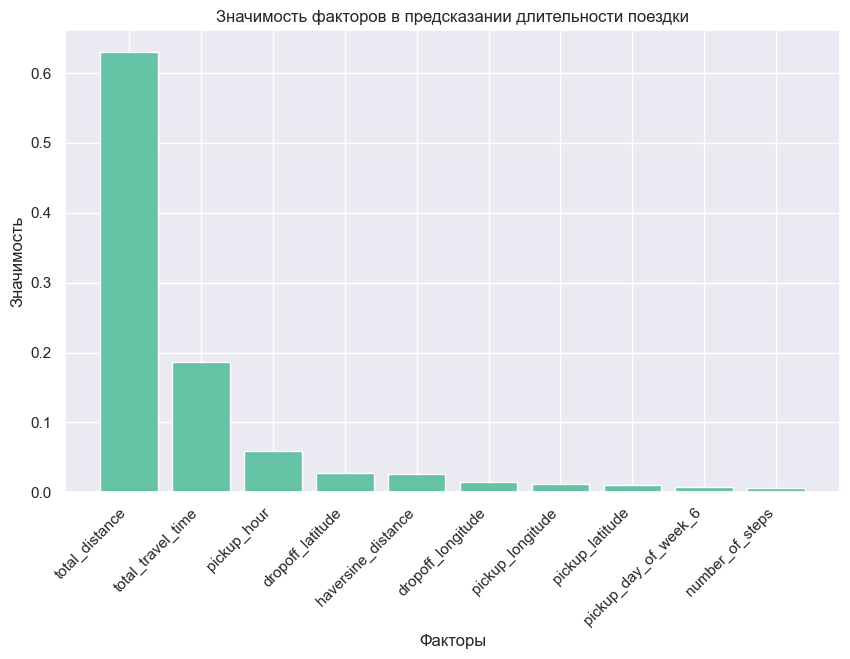

In [ ]:
# Находим коэффициенты значимости каждого из факторов для самой удачной модели
importance = gb_reg.feature_importances_

# Для удобства визуализации создаём DataFrame из наименований признаков и их коэффициентов значимости
features_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': list(importance)})
features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))

# Визуализируем коэффициенты значимости признаков в виде столбчатой диаграммы
plt.bar(features_importance_df['Feature'][:3], features_importance_df['Importance'][:3])
plt.xlabel('Факторы')
plt.ylabel('Значимость')
plt.title('Значимость факторов в предсказании длительности поездки')
plt.xticks(rotation=45, ha='right')
plt.show()

Для лучшей из построенных нами моделей рассчитаем медианную абсолютную ошибку (*MeAE* - в *sklearn* функция *median_absolute_error*) предсказания длительности поездки такси на валидационной выборке:

$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики *MeAE* переведём в минуты и округлим до десятых.

In [49]:
y_valid_pred_log = gb_reg.predict(X_valid_scaled)

y_valid_pred = np.exp(y_valid_pred_log) - 1
y_valid_real = np.exp(y_valid_log) - 1

MeAE = metrics.median_absolute_error(y_valid_real, y_valid_pred) / 60
print(f'Результат MeAE на валидационной выборке: {round(MeAE, 1)}')

Результат MeAE на валидационной выборке: 1.8


Финальный шаг — сделать *submit* — предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам ещё пригодится:

In [50]:
test_data = pd.read_csv('data/test.csv')
osrm_data_test = pd.read_csv('data/osrm_data_test.csv')

test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:

* Перевести признак `pickup_datetime` в формат datetime;

* Добавить новые признаки (временные, географические, погодные и другие факторы);

* Произвести очистку данных от пропусков;

* Произвести кодировку категориальных признаков:
    
    * Закодировать бинарные признаки;
    
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке *OneHotEncoder’а*;

* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью *SelectKBest*;

* Нормализовать данные с помощью обученного на тренировочной выборке *MinMaxScaler’а*.

In [51]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')


test_data = add_datetime_features(test_data)


test_data = add_holiday_features(test_data, holiday_data)


test_data = add_osrm_features(test_data, osrm_data_test)


test_data = add_geographical_features(test_data)


test_data = add_cluster_features(test_data, kmeans)


test_data = add_weather_features(test_data, weather_data)


test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[features]
X_test_scaled = scaler.transform(X_test)
print('Размер тестовой выборки: {}'.format(X_test.shape))

Размер тестовой выборки: (625134, 25)


Только после выполнения всех этих шагов можно будеть сделать предсказание длительности поездки для тестовой выборки. Не забываем перевести предсказания из логарифмического масштаба в истинный, используя формулу:

$$y_i=exp(z_i)-1$$

In [ ]:
y_test_pred_log = gb_reg.predict(X_test_scaled)
y_test_pred = np.exp(y_test_pred_log) - 1

После того, как мы сформируем предсказание длительности поездок на тестовой выборке нам необходимо будет создать *submission*-файл в формате *csv*, отправить его на платформу *Kaggle* и посмотреть на результирующее значение метрики *RMSLE* на тестовой выборке.

In [ ]:
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_pred})
submission.to_csv('data/submission_gb.csv', index=False)

<center>

![image](data/kaggle_score.png)